# Regression

> **선형 회귀 모델**

특정한 입력변수값을 사용하여 출력변수의 값을 계산하는 것을 예측(prediction)문제라고 한다. </br>
예측문제 중에서 출력변수의 값이 연속값인 문제를 회귀(regression) 또는 회귀분석(regression analysis)이라고 한다.

# OLS 실습

> **선형 최소 제곱(Ordinary Linear Least Square), 최소자승법(OLS: Ordinary Least Squares)**

- ERROR인 잔차제곱합(RSS: Residual Sum of Squares)을 최소화하는 가중치 벡터를 구하는 방법이다.

- 가중치 벡터 $X = (A^TA)^{-1}A^TY$

- $~ X=\begin{bmatrix} \; a \; \\ b \end{bmatrix},~~~$
	$ A=\begin{bmatrix} \; x_1 \; & \; 1 \; \\ \vdots & \vdots \\ x_n & 1 \end{bmatrix},~~~$
	$ Y=\begin{bmatrix} \; y_1 \; \\ \vdots \\ y_n \end{bmatrix}$

In [1]:
# !pip install statsmodels

#### --▶ Sample Data 만들기

In [2]:
import pandas as pd

data = {'x': [1, 2, 3, 4, 5], 'y': [1, 3, 4, 6, 5]}
df = pd.DataFrame(data)
df

,x,y
0,1,1
1,2,3
2,3,4
3,4,6
4,5,5


#### --▶ 가설 세우기

- 선형 회귀 모델 생성

- 데이터에 맞는(fit) 최선의 가중치 벡터(a, b)를 찾아 선형식을 완성한다.

In [3]:
import statsmodels.formula.api as smf

# formula='y ~ x'는 "y = ax + b"라는 의미를 내포하고 있다. 
lm_model = smf.ols(formula='y ~ x', data=df).fit()

In [5]:
lm_model.params #--> 데이터에 맞는(fit) 최선의 가중치 벡터(a, b)

Intercept    0.5
x            1.1
dtype: float64

#### --▶ 시각화

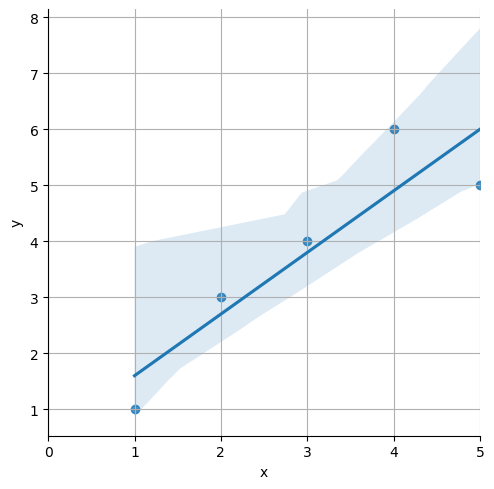

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore", category=UserWarning)

# plt.figure(figsize=(10,10))
sns.lmplot(x='x', y='y',data = df)
plt.xlim([0,5])
plt.grid()
plt.show()

#### --▶ 잔차(residue) 평가

- 잔차[= 실제값 - 예측값\]는 평균이 0인 정규분포를 따르는 것 이어야 한다.

- 잔차 평가는 잔차의 평균이 0이고 정규분포를 따르는 지 확인하는 것이다.

In [18]:
residual = lm_model.resid
residual

0   -0.6
1    0.3
2    0.2
3    1.1
4   -1.0
dtype: float64

In [19]:
df

,x,y
0,1,1
1,2,3
2,3,4
3,4,6
4,5,5


## 📍 결정계수 R-squared

<img src="https://github.com/ElaYJ/Study_Machine_Learning/assets/153154981/83921ccf-2275-483a-b7fa-ad439a45deb4" width="67%" height="67%">

$~~~~~\large \text{R-squared}=\cfrac{\text{ssR}}{\text{ssT}}~~~\Rightarrow~~~$
$\Large \boxed{~ R^2 = \cfrac{~\sum_{i=1}^n(\hat y - \mu)^2~}{\sum_{i=1}^n(y - \mu)^2}~}$

- 결정계수는 참값(실제 데이터의 값)이 가지는 평균으로부터의 오차가 얼마나 되는지에 대한 개념이다.

- ssR은 참값이 가지는 평균으로부터 선형 회귀 모델의 오차에 대한 분산이고,

- ssT = ssR + ssE 로, 이때 ssE가 위에서 구한 잔차(residual)의 분산으로 "잔차제곱합"이라고 한다.

- $\hat y \;$(y_hat) : 예측된 값

- 예측 값과 실제 값(y)이 일치하면 결정계수는 1이 된다. 즉 **결정계수가 높을 수록 좋은 모델**이다.

- R-squared는 회귀 모델의 성능을 평가하는 다양한 지표 중 하나로 통계적인 방식이다.

- 머신러닝에서는 예측 성능에 집중하기 때문에 결정계수를 회귀 모델의 성능 지표로 잘 사용하지 않는다.

#### --▶ numpy로 직접 결정계수 계산

In [22]:
import numpy as np

mu = np.mean(df.y)

y = df.y
y_hat = lm_model.predict()
print(y.values.tolist(), y_hat)

np.sum((y_hat - mu)**2) / np.sum((y - mu)**2)

[1, 3, 4, 6, 5] [1.6 2.7 3.8 4.9 6. ]


0.8175675675675674

#### --▶ 모델로 결정계수 확인

In [23]:
lm_model.rsquared

0.8175675675675675

</br>

#### --▶ Residue(잔차)의 분포 확인

In [25]:
residual

0   -0.6
1    0.3
2    0.2
3    1.1
4   -1.0
dtype: float64

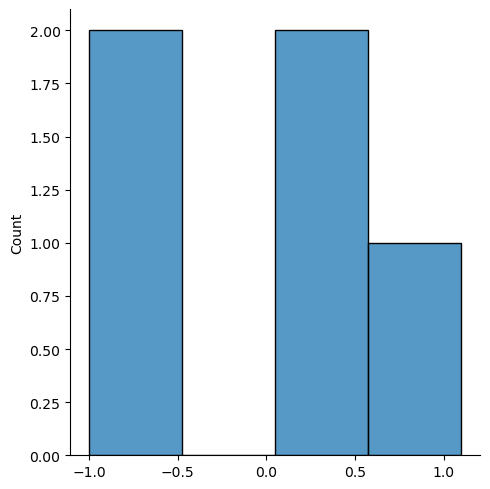

In [24]:
sns.displot(residual)